<a href="https://colab.research.google.com/github/ShivanshuPurohit/Practice-models/blob/master/Shakespear's%20sonnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.models import load_model
import sys

In [0]:
def load_data(maxlen=25, step=3):
    '''
    Load in training text and vectorize it into 3D tensor
    Args:
        maxlen: Maximum length of sequence
        step: Step size for sampling new sequence
    Returns:
        Numpy tensor of shape (samples, seq_len, num_chars)
    '''
    with open('sonnets.txt', 'r') as f:
        data = f.read().lower()

    sentences = []
    targets = []
    # Loop through sonnets and create sequences and associated targets
    for i in range(0, len(data) - maxlen, step):
        sentences.append(data[i:i + maxlen])
        targets.append(data[maxlen + i])
    # Grab all unique characters in corpus
    chars = sorted(list(set(data)))

    # Dictionary mapping unique character to integer indices
    char_indices = dict((char, chars.index(char)) for char in chars)
    return data, char_indices, chars


def sample(preds, temperature=1.0):
    '''
    Reweight the predicted probabilities and draw sample from
    newly created probability distribution
    Args:
        preds: Numpy array of character probabilities
        temperature: Float representing randomness of reweighting probabilities
                     Higher temp, more randomn. Lower temp, more deterministic
    Returns:
        Index of largest probability from reweighted probabilities
    '''
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


def generate_sonnet():
    '''
    Choose a random seed text and print 600 predicted characters to console
    Args:
        None
    Returns:
        600 characters printed to console
    '''
    # Max length of each sequence. Same as in Jupyter notebook
    maxlen = 40
    # Sample new sequence every step characters
    step = 3
    data, char_indices, chars = load_data(maxlen, step)

    # Load model trained in Jupyter notebook
    model = load_model('shakespeare_sonnet_model.h5')
    # Choose random seed text
    start_idx = np.random.randint(0, len(data) - maxlen - 1)
    new_sonnet = data[start_idx:start_idx + maxlen]
    sys.stdout.write(new_sonnet)
    for i in range(600):
        # Vectorize generated text
        sampled = np.zeros((1, maxlen, len(chars)))
        for j, char in enumerate(new_sonnet):
            sampled[0, j, char_indices[char]] = 1.

        # Predict next character
        preds = model.predict(sampled, verbose=0)[0]
        pred_idx = sample(preds, temperature=0.5)
        next_char = chars[pred_idx]

        # Append predicted character to seed text
        new_sonnet += next_char
        new_sonnet = new_sonnet[1:]

        # Print to console
        sys.stdout.write(next_char)
        sys.stdout.flush()


if __name__ == '__main__':
    ''' Run main program '''
    generate_sonnet()
    print()

is lust in action: and till action, lust the brave the proughs wall the with farteres de my so now

and stan the will the sire of love me bear,
the are thy forle the ans thie beast steet.
the ear the frow in thee the with my be to be.

and in the strof have to but show the rears,
and sting con love wher his thue word all hen my leave,
your mare the sweet in where the live bear the prave,
when when is his thing of the worth to shat the rear mare
the of her as thou shath this what hat me no thee war sweet hade reass to ey,
and wilt thou sen be our that his spire steel,
and my more the wipl the will with and steet stire,
and stare mare


In [0]:
import os
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline
np.random.seed(21)

In [0]:
with open('sonnets.txt','r') as f:
  data = f.read().lower()
print('Corpus length : %d characters' %len(data))

Corpus length : 94651 characters


Average sonnet length: 612.63 characters


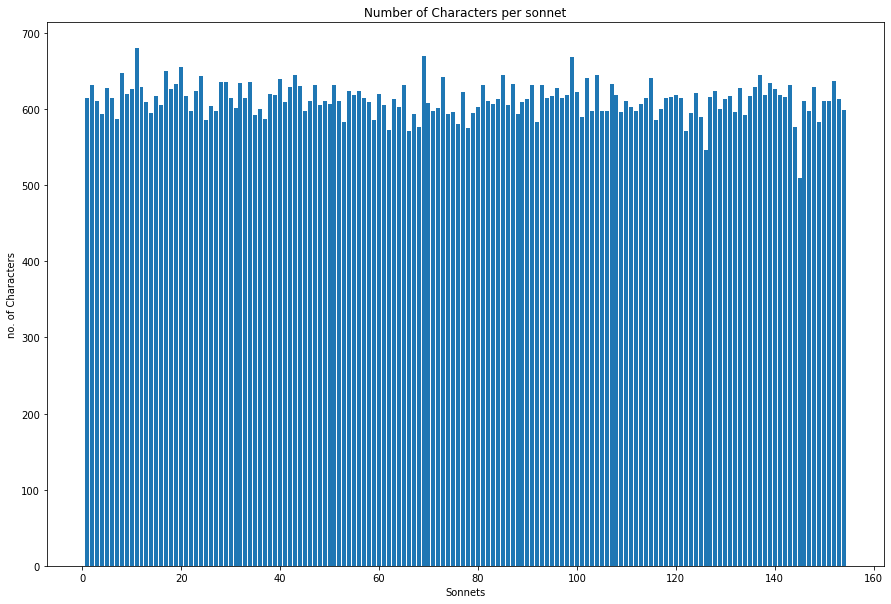

In [0]:
#visualize character length
sonnets = data.split('\n\n')
sonnet_lens = [len(sonnet) for sonnet in sonnets]
print('Average sonnet length: %.2f characters' % np.mean(sonnet_lens))

plt.figure(figsize=(15,10))
plt.bar([i for i in range(1,len(sonnets)+1)],sonnet_lens)
plt.title('Number of Characters per sonnet')
plt.ylabel('no. of Characters')
plt.xlabel('Sonnets')
plt.show()

In [0]:
#max length of each sentence
maxlen = 40

#sample new sequence ever step characters
step = 3

sentences=[]
targets=[]

#loop through sonnets and create new sequences and targets
for i in range(0,len(data)-maxlen,step):
  sentences.append(data[i:i+maxlen])
  targets.append(data[maxlen+i])

print("number of sequences: ",len(sentences))

#grab all unique characters in corpus
chars = sorted(list(set(data)))
print("no. of unique characters: ",len(chars))

#dictionary mapping unique characters to integer iindices
char_indices = dict((char, chars.index(char)) for char in chars)

number of sequences:  31537
no. of unique characters:  38


In [0]:
#vectorize sequences and targets
x= np.zeros((len(sentences),maxlen,len(chars)),dtype=np.bool)
y= np.zeros((len(sentences),len(chars)),dtype=np.bool)

for i, sentence in enumerate(sentences):
  for j, char in enumerate(sentence):
    x[i,j,char_indices[char]]=1
    y[i,char_indices[targets[i]]]=1

print("Size of training sequences:", x.shape)
print("Size of training targets:", y.shape)

Size of training sequences: (31537, 40, 38)
Size of training targets: (31537, 38)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(256,return_sequences=True,input_shape=(maxlen,len(chars))))
model.add(LSTM(64,input_shape=(maxlen,len(chars))))
model.add(Dense(len(chars),activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 40, 256)           302080    
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dense_2 (Dense)              (None, 38)                2470      
Total params: 386,726
Trainable params: 386,726
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.optimizers import SGD
optimizer = SGD(lr=0.01,momentum =0.9,nesterov=True)
model.compile(optimizer=optimizer,loss='categorical_crossentropy')

In [0]:
def samples(preds,temperature=1.0):
  preds=np.asarray(preds).astype('float64')
  preds=np.log(preds)/temperature
  exp_preds = np.exp(preds)
  preds=exp_preds/np.sum(exp_preds)
  probas=np.random.multinomial(1,preds,1)
  return np.argmax(probas)

In [0]:
epochs = 40

loss = []  # Custom history list to save model's loss

# Create directory to store generated text
base_dir = 'generated_text'
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)

for epoch in range(1, epochs+1):
    print("Epoch", epoch)
    # Fit model for 1 epoch then generate text given a seed.
    history = model.fit(x, y, batch_size=128, epochs=1)
    loss.append(history.history['loss'][0])
    
    # Create directory to store text for each epoch
    epoch_dir = os.path.join(base_dir, 'epoch_' + str(epoch))
    if not os.path.isdir(epoch_dir):
        os.mkdir(epoch_dir)
    
    # Select a random seed text to feed into model and generate text
    start_idx = np.random.randint(0, len(data) - maxlen - 1)
    seed_text = data[start_idx:start_idx + maxlen]
    for temp in [0.2, 0.5, 1.0, 1.3]:
        generated_text = seed_text
        temp_file = 'epoch' + str(epoch) + '_temp' + str(temp) + '.txt'
        file = open(os.path.join(epoch_dir, temp_file), 'w')
        file.write(generated_text)
        
        # Predict and generate 600 characters (approx. 1 sonnet length)
        for i in range(600):
            # Vectorize generated text
            sampled = np.zeros((1, maxlen, len(chars)))
            for j, char in enumerate(generated_text):
                sampled[0, j, char_indices[char]] = 1.
            
            # Predict next character
            preds = model.predict(sampled, verbose=0)[0]
            pred_idx = sample(preds, temperature=temp)
            next_char = chars[pred_idx]
            
            # Append predicted character to seed text
            generated_text += next_char
            generated_text = generated_text[1:]
            
            # Write to text file
            file.write(next_char)
        print('Temp ' + str(temp) + " done.")
        file.close()

Epoch 1
Epoch 1/1
31537/31537 [==============================] - 124s 4ms/step - loss: 3.1190
Temp 0.2 done.
Temp 0.5 done.
Temp 1.0 done.
Temp 1.3 done.
Epoch 2
Epoch 1/1
31537/31537 [==============================] - 122s 4ms/step - loss: 3.0105
Temp 0.2 done.
Temp 0.5 done.
Temp 1.0 done.
Temp 1.3 done.
Epoch 3
Epoch 1/1
31537/31537 [==============================] - 123s 4ms/step - loss: 3.0072
Temp 0.2 done.
Temp 0.5 done.
Temp 1.0 done.
Temp 1.3 done.
Epoch 4
Epoch 1/1
31537/31537 [==============================] - 122s 4ms/step - loss: 3.0061
Temp 0.2 done.
Temp 0.5 done.
Temp 1.0 done.
Temp 1.3 done.
Epoch 5
Epoch 1/1
31537/31537 [==============================] - 122s 4ms/step - loss: 3.0053
Temp 0.2 done.
Temp 0.5 done.
Temp 1.0 done.
Temp 1.3 done.
Epoch 6
Epoch 1/1
31537/31537 [==============================] - 122s 4ms/step - loss: 3.0046
Temp 0.2 done.
Temp 0.5 done.
Temp 1.0 done.
Temp 1.3 done.
Epoch 7
Epoch 1/1
31537/31537 [==============================] - 122s 4ms/st

In [0]:
def generate_sonnet(temp):
  start_idx = np.random.randint(0,len(data)-maxlen-1)
  new_sonnet=data[start_idx:start_idx+maxlen]
  sys.stdout.write(new_sonnet)
  
  for i in range(600):
    sampled = np.zeros((1,maxlen,len(chars)))
    for j,char in enumerate(new_sonnet):
      sampled[0,j,char_indices[char]]=1

    preds = model.predict(sampled,verbose=0)[0]
    pred_idx = sample(preds, temperature=temp)
    next_char = chars[pred_idx]

    new_sonnet += next_char
    new_sonnet = new_sonnet[1:]
    sys.stdout.write(next_char)
    sys.stdout.flush()

In [0]:
generate_sonnet(0.5)

 mind:
look! what an unthrift in the worllves'ding,
i whou so lat meserave peacist thee bides these whale
in dade southes in thee ofneur to lose,
the mathy theurores thouthes thou fothet beingeling,
  fat mins so toue wath thou thige sele wertere,
mat or me thee tine nome sereerored theres cheer weres pove,
that thels hesen though tron soulce crace
to the afeling thee thees on thou bethese are woree,
whis the sore in thing four iby thee sores thee freing,
thouch thou meoferes there thy yons thy irresthet these,
on berires tin the is in the for thee forethen ande-me thee home,
arane than thou tho leartes thear, and meithen
sath the m

In [0]:
generate_sonnet(0.2)

.
o! change thy thought, that i may changeres the mererereres thee more,
where theus the the mereres the the moult,
   and the mere the the the sore thee there,
the sore the thee the the souther the thee there,
whin the sore the mereres the theur thee beart,
thou the theast the sore thou the there,
and the the thee the in the sore the mereres the mother thee,
the sore the sore the the sore the shathes there the meatheres and thee whoughes thee thee thee thee,
the the sore the mereres the mase the mererest the sore,
what the southeres thou the the sore thee thee thee theare,
the sale the the sore the mealt the shearteres thee anderes

In [0]:
model.save('Shakespeare_sonnets.h5')